<a href="https://colab.research.google.com/github/Aishuav01/CS746-PERSPECTIVES-ON-DATASCIENCE/blob/main/CS746_HW3_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook. 

**We are using the same data as for the previous homework**. Use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# 1. Data from our lives:

# **Student data** may contain variables such as name, id, section, hobbies,marks, height, weight, hair_thickness, leg_size, has_sight, fav_color, fav_subject
Such data will need feature selection/reduction in order to describe the student character we do not require variables such as height, weight, hair_thickness ,leg size or has_sight which we can get rid of.

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

*Your Answer:*

# 2. Variable selection

In our class so far we covered three types of feature selection techniques. They were: 
1. Filter methods
2. Wrapper methods
3. Embedded methods

Use the dataset 'auto_imports1.csv' from our previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

In [106]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [107]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
#Read in data
df =pd.read_csv('gdrive/My Drive/auto_imports_cleaned_ver.csv')

df.head()

,Unnamed: 0,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


In [109]:
df = df.drop(df.columns[0], axis=1)

In [110]:
df.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


### 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

We can observe that our input is numerical data and assuming the output is numerical as well, we can use the pearson's correlation filter method for feature selection.

In [111]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array

In [112]:
X= df.drop(columns=["price"])
#Dependent variable price
y=df['price'].values.reshape(-1,1)
print(X)

     wheel_base  length  width  heights  curb_weight  engine_size  bore  \
0          88.6   168.8   64.1     48.8         2548          130  3.47   
1          88.6   168.8   64.1     48.8         2548          130  3.47   
2          94.5   171.2   65.5     52.4         2823          152  2.68   
3          99.8   176.6   66.2     54.3         2337          109  3.19   
4          99.4   176.6   66.4     54.3         2824          136  3.19   
..          ...     ...    ...      ...          ...          ...   ...   
196       109.1   188.8   68.9     55.5         2952          141  3.78   
197       109.1   188.8   68.8     55.5         3049          141  3.78   
198       109.1   188.8   68.9     55.5         3012          173  3.58   
199       109.1   188.8   68.9     55.5         3217          145  3.01   
200       109.1   188.8   68.9     55.5         3062          141  3.78   

     stroke  comprassion  horse_power  peak_rpm  city_mpg  highway_mpg  \
0      2.68          9.0 

Using F-regression

In [113]:
print(df.shape)
feature_select = SelectKBest(score_func=f_regression, k=5)
feature_selected = feature_select.fit_transform(X,y)

(201, 15)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
print("Originial no. of features: ", df.shape[1]-1)
print("Selected no. of features :",feature_selected.shape[1])

Originial no. of features:  14
Selected no. of features : 5


In [194]:
filtered = feature_select.get_support()
features = array(df.columns.all)
 
print("All features:")
print(features)
print()
print("Selected best 5 predictors:")
for i in range(df.columns.size-1):
  if(filtered[i] == True):
    print(df.columns[i])


All features:
<bound method Index.all of Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas'],
      dtype='object')>

Selected best 5 predictors:
width
curb_weight
engine_size
horse_power
highway_mpg


**Findings** :
From the avaible 14 features, the best 5 features were selected using the pearson's correlation filter method with respect to target variable price.
width
curb_weight
engine_size
horse_power
highway_mpg

### 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

# Forward Selection Wrapper Method
SequentialFeatureSelector

In [116]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Define Sequential Forward Selection (sfs)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SFS(knn, n_features_to_select=5, cv=2)

X= df.drop(columns=["price"])
#Dependent variable price
y=df['price'].values.reshape(-1,1)

#Use SFS to select the top 5 features 

sfs.fit(X, y)




In [118]:
print("Originial no. of features: ", df.shape[1]-1)
print("Selected no. of best features :",sfs.transform(X).shape[1])

Originial no. of features:  14
Selected no. of best features : 5


In [200]:
forward_selected = sfs.get_support()
print(sfs.get_params) 
print(sfs.get_feature_names_out())
print("All feature.s:")
print(df.columns.all)
print()
print("Selected best 5 predictors:")
for i in range(df.columns.size):
  if( i<len(forward_selected) and forward_selected[i] == True):
    print(df.columns[i])

<bound method BaseEstimator.get_params of SequentialFeatureSelector(cv=2, direction='backward',
                          estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=5)>
['wheel_base' 'width' 'heights' 'engine_size' 'bore']
All feature.s:
<bound method Index.all of Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas'],
      dtype='object')>

Selected best 5 predictors:
wheel_base
width
heights
engine_size
bore


**Findings:** Observed that through forward feature selection using 2-fold split selected 5 best predictors [ wheel_base, length,heights,engine_size ,horse_power] which are not similar to filter method that we used earlier.

I had made a mistake here where I used X=sm.add_constants while splitting the train/test split but later on realized it was adding a const table and my results were, corrected it is using df.iloc[] to split.

# Backward Selection Wrapper Method

In [120]:
#Define Sequential Forward Selection (sfs)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SFS(knn, n_features_to_select=5, cv=2, direction="backward")

X= df.iloc[:,:7]
#Dependent variable price
y=df['price'].values.reshape(-1,1)
print(X)
#Use SFS to select the top 5 features 

sfs.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning

     wheel_base  length  width  heights  curb_weight  engine_size  bore
0          88.6   168.8   64.1     48.8         2548          130  3.47
1          88.6   168.8   64.1     48.8         2548          130  3.47
2          94.5   171.2   65.5     52.4         2823          152  2.68
3          99.8   176.6   66.2     54.3         2337          109  3.19
4          99.4   176.6   66.4     54.3         2824          136  3.19
..          ...     ...    ...      ...          ...          ...   ...
196       109.1   188.8   68.9     55.5         2952          141  3.78
197       109.1   188.8   68.8     55.5         3049          141  3.78
198       109.1   188.8   68.9     55.5         3012          173  3.58
199       109.1   188.8   68.9     55.5         3217          145  3.01
200       109.1   188.8   68.9     55.5         3062          141  3.78

[201 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist

SequentialFeatureSelector(cv=2, direction='backward',
                          estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=5)

In [121]:
print("Originial no. of features: ", df.shape[1]-1)
print("Selected no. of best features :",sfs.transform(X).shape[1])

Originial no. of features:  14
Selected no. of best features : 5


In [122]:
forward_selected = sfs.get_support()
print(forward_selected)
 
print(sfs.get_feature_names_out())
print("All features:")
print(df.columns.all)
print()
print("Selected best 4 predictors:")
for i in range(df.columns.size):
  if( i<len(forward_selected) and forward_selected[i] == True):
    print(df.columns[i])

[ True False  True  True False  True  True]
['wheel_base' 'width' 'heights' 'engine_size' 'bore']
All features:
<bound method Index.all of Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas'],
      dtype='object')>

Selected best 4 predictors:
wheel_base
width
heights
engine_size
bore


**Findings**: Observed that through forward feature selection using 2-fold split selected 5 best predictors [  wheel_base, width, heights, engine_size,bore] which are not similar to filter method that we used earlier.


### 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

# Ridge Regression Embedded Methods

In [149]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.8)
ridge.fit(X,y)

Ridge(alpha=0.8)

In [142]:
ridge.coef_

array([[ 0.00000000e+00,  9.24557171e+01, -1.13755501e+02,
         5.97029710e+02,  1.77281443e+02,  2.42758781e+00,
         1.27634605e+02, -1.25737775e+03, -3.46211050e+03,
         1.70778647e+02,  1.28430637e+01,  2.44047932e+00,
        -4.27842492e+02,  2.70368128e+02, -1.73099822e+03]])

In [143]:
np.sum(ridge.coef_ >= 0)

10

No handles with labels found to put in legend.


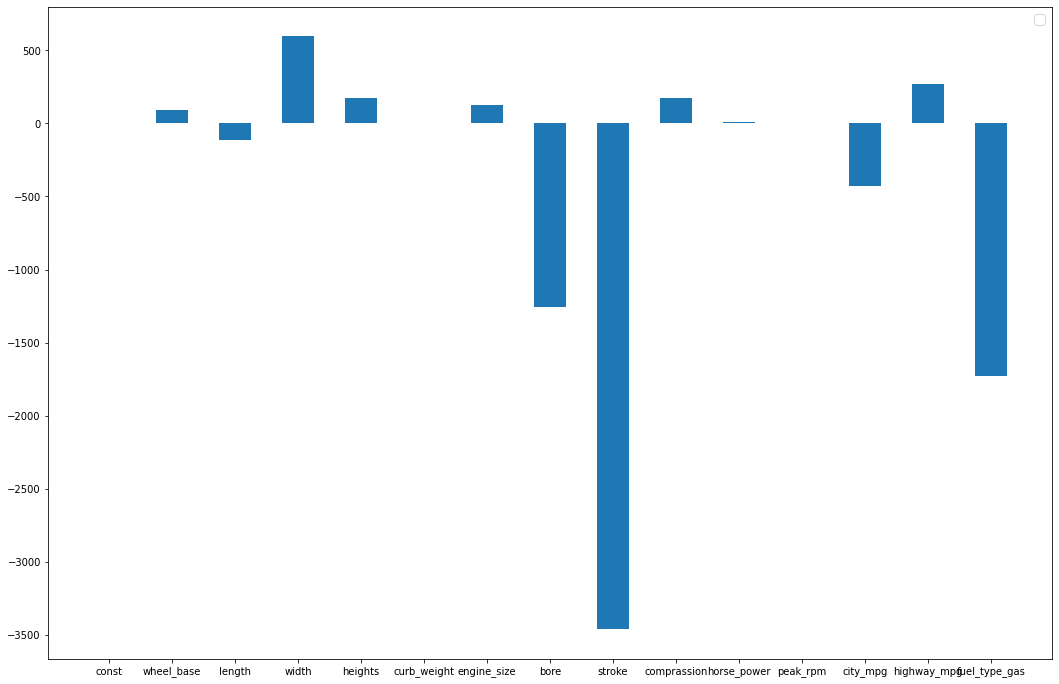

In [182]:
coef_val = ridge.coef_[0]
f,ax = plt.subplots(figsize=(18,12))
plt.bar([x_val for x_val in X], coef_val, width=0.5)
ax.legend(fontsize = 14)
plt.show()



**Findings**: From the ridge coeeficients value, we can consider features which have higher coeficient value which are more important and correlated to the target, from the above plot, if we have to look for best 5 features predictors it would be **width, heights, engine_size, comprassion,highway_mpg**

# Full linear regression model ( repeating process from previous hw )

In [128]:
#Manipulate data to fit regression analysis
#Independent variables : all except price
X= sm.add_constant(df.drop(['price'],axis=1))
#Dependent variable price
y=df['price'].values.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [129]:
model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     73.15
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           9.55e-68
Time:                        03:20:06   Log-Likelihood:                -1901.6
No. Observations:                 201   AIC:                             3833.
Df Residuals:                     186   BIC:                             3883.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.385e+04   1.87e+04     -1.814      0.071   -7.07e+04    2956.672
wheel_base       84.8492    105.228      0.806      0.421    -122.744     292.443
length         -101.1170     59.523     -1.699      0.091    -218.545      16.311
width           591.6150    262.270      2.256      0.025      74.209    1109.021
heights         169.1734    137.819      1.228      0.221    -102.717     441.064
curb_weight       2.1786      1.770      1.231      0.220      -1.313       5.670
engine_size     132.1719     14.884      8.880      0.000     102.809     161.534
bore          -1620.7975   1239.745     -1.307      0.193   -4066.566     824.971
stroke        -3995.2231    880.855     -4.536      0.000   -5732.974   -2257.472
comprassion    -216.6570    438.356     -0.494      0.622   -1081.445     648.131
horse_power      12.2614     16.019      0.765      0.445     -19.340      43.863
peak_rpm          2.6411      0.726      3.636      0.000       1.208       4.074
city_mpg       -430.1114    183.041     -2.350      0.020    -791.214     -69.009
highway_mpg     290.3236    168.493      1.723      0.087     -42.080     622.727
fuel_type_gas -7138.3023   5969.621     -1.196      0.233   -1.89e+04    4638.567
==============================================================================
Omnibus:                       22.502   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.985
Skew:                           0.396   Prob(JB):                     7.74e-15
Kurtosis:                       5.670   Cond. No.                     4.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
_y = model1.params

In [131]:
for i in range(df.columns.size):
  if _y[i-1]>0:
    print(df.columns[i] , " = " , _y[i-1])

width  =  84.84922795186296
curb_weight  =  591.6149526182747
engine_size  =  169.17344622788298
bore  =  2.1785845382979128
stroke  =  132.171850646402
city_mpg  =  12.261448561231948
highway_mpg  =  2.6410963267337353
fuel_type_gas  =  290.3235859322871


From the full linear regression results we can observe that the above values have positive higher coefficients, if we have to select best 5 in this result, it would be the variables with highest coefs, which are **curb_weight, engine_size, fule_type_gas, stroke, width**

### 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

#Let us compare the selected feature results from all the above **methods**


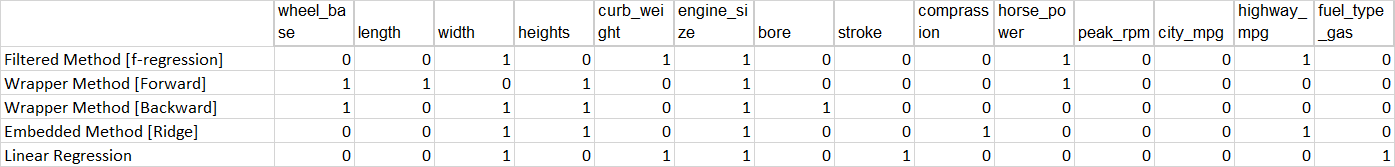


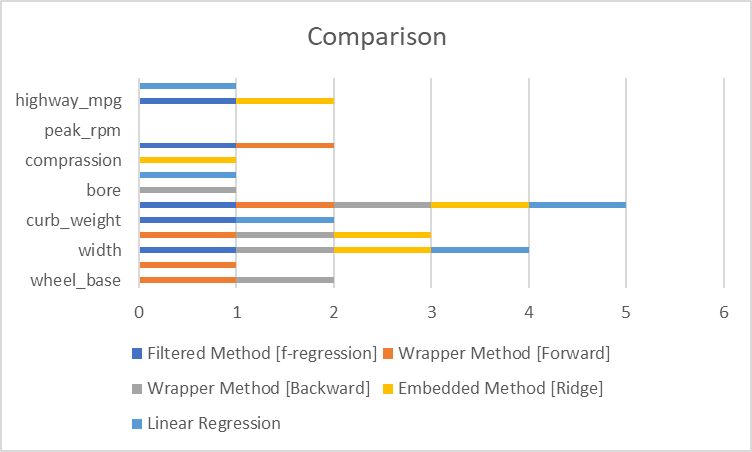

We can observe that width, heights, engine_size are best features selected by atmost all the methods.

### 2.5 Bonus question (*extra 5 points*)

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

In [150]:
#Attempting PCA analysis
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [167]:
features = df[['wheel_base','length','width','heights','curb_weight','engine_size','bore','stroke','comprassion','horse_power','peak_rpm','city_mpg','highway_mpg','fuel_type_gas']]
scaled_features = StandardScaler().fit_transform(features)

In [168]:
pd.DataFrame(scaled_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.534986,-1.821138,-0.291435,0.169977,-0.259462,-0.652249,-0.542288,0.332411
1,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.534986,-1.821138,-0.291435,0.169977,-0.259462,-0.652249,-0.542288,0.332411
2,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.394339,0.681922,-0.291435,1.282094,-0.259462,-0.964397,-0.689386,0.332411
3,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.503256,0.460132,-0.041121,-0.062792,0.775298,-0.184027,-0.100993,0.332411
4,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.503256,0.460132,-0.541748,0.273429,0.775298,-1.120471,-1.277779,0.332411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.702619,1.187733,1.436357,0.709881,0.768075,0.340812,1.684468,-0.331976,-0.166278,0.247566,0.568346,-0.340101,-0.395189,0.332411
197,1.702619,1.187733,1.388653,0.709881,0.956057,0.340812,1.684468,-0.331976,-0.366529,1.437273,0.361394,-0.964397,-0.836484,0.332411
198,1.702619,1.187733,1.436357,0.709881,0.884353,1.112950,0.942866,-1.219136,-0.341497,0.764830,0.775298,-1.120471,-1.130681,0.332411
199,1.702619,1.187733,1.436357,0.709881,1.281633,0.437329,-1.170697,0.460132,3.212954,0.040661,-0.673367,0.128120,-0.542288,-3.008322


In [192]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaled_features)
principalComponents

array([[-0.76200309, -1.78905188, -0.02802886,  2.65958961,  0.72935152],
       [-0.76200309, -1.78905188, -0.02802886,  2.65958961,  0.72935152],
       [ 0.23254229, -1.19155688, -1.51727319, -0.5406603 ,  0.0135372 ],
       ...,
       [ 3.28085255, -0.80852385,  1.31966315, -0.26480998,  0.93499609],
       [ 2.33971658,  4.19654659, -1.1203047 , -0.6788508 ,  1.94084603],
       [ 3.04995443, -0.27650083,  1.12404344, -0.48013701,  0.33774816]])

In [193]:
pca.explained_variance_ratio_

array([0.476939  , 0.21754073, 0.09076563, 0.06351376, 0.04850278])

It can be seen that first principal component is responsible for 47.69% variance. Similarly, the second principal component causes 21.7% variance in the dataset. Collectively we can say that (47.69 + 21.7) 69.39% percent of the classification information contained in the feature set is captured by the first two principal components.

In [186]:
pca4 = PCA(n_components = 4)
pca4.fit_transform(scaled_features)

array([[-7.62003087e-01, -1.78905188e+00, -2.80288649e-02,
         2.65958961e+00],
       [-7.62003087e-01, -1.78905188e+00, -2.80288649e-02,
         2.65958961e+00],
       [ 2.32542286e-01, -1.19155688e+00, -1.51727319e+00,
        -5.40660299e-01],
       [-2.30985587e-01, -3.50096129e-01, -9.03440800e-02,
        -1.12694390e+00],
       [ 1.11562172e+00, -1.21965797e+00, -2.36906072e-01,
        -1.03692045e+00],
       [ 6.17834614e-01, -1.12275275e+00, -4.48242561e-01,
        -8.44880259e-01],
       [ 2.60260986e+00, -3.00634861e-01,  3.31397734e-01,
        -2.01597495e+00],
       [ 2.68238833e+00, -2.92247526e-01,  3.20426643e-01,
        -2.00916859e+00],
       [ 3.25498357e+00, -7.26709779e-01,  1.80078475e-01,
        -2.09889183e+00],
       [-1.28623958e-01, -1.03705419e+00,  1.36631759e+00,
        -4.84088920e-02],
       [-1.28623958e-01, -1.03705419e+00,  1.36631759e+00,
        -4.84088920e-02],
       [ 1.03571373e+00,  3.15111632e-02,  4.49660234e-01,
      

In [187]:
pca4.explained_variance_ratio_

array([0.476939  , 0.21754073, 0.09076563, 0.06351376])

In [189]:
pca1 = PCA(n_components = 1)
pca1.fit_transform(scaled_features)
pca1.explained_variance_ratio_

array([0.476939])